In [84]:
import numpy as np
from minisom import MiniSom

from pylab import text,show,cm,axis,figure,subplot,imshow,zeros
import matplotlib.pyplot as plt

from random import shuffle

Then we load the MNIST data. First time it downloads the data, which can take a while.

In [85]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='.cache')

# Let's inspect only 1024 first training samples in this notebook
d = zip(mnist.data, mnist.target)

shuffle(d)

images = [i[0] for i in d[:1024]]
targets = [i[1] for i in d[:1024]]

## Learning

As the SOM visualizations use a regular grid, we could use the whole MNIST training data to train the SOM.  Let's however use only a subset of the data to reduce training time. 

In [86]:
x_dim = 20
y_dim = 30

epochs = 100

som = MiniSom(x_dim, y_dim, 784, sigma=.25, learning_rate=.1)
som.train_random(images, epochs)

Next, let's compute the nearest training sample for each SOM unit. 

In [94]:
winners = {}
distances = np.zeros([x_dim, y_dim])

distances.fill(float('inf'))

for index, image in enumerate(images):
    i, j = som.winner(image)
    dist = np.linalg.norm(image - som._weights[i,j])
    if dist < distances[i,j]:
        winners[i,j] = index
        distances[i,j] = dist

## Visualization

We can visualize each SOM unit by the label of the nearest training sample.  The empty slots correspond to SOM units that have no associated data. 

In [126]:
figure(figsize=(12, 12))
for i, j in winners:
    t = targets[winners[i,j]]
    text(i, j, str(t), color=cm.Dark2(t / 9.))

ax = axis([0, x_dim, 0 ,y_dim])

SyntaxError: invalid syntax (<ipython-input-126-83d565828c47>, line 6)

Alternatively, as we are working with image data, we can draw the actual nearest samples for each SOM unit.

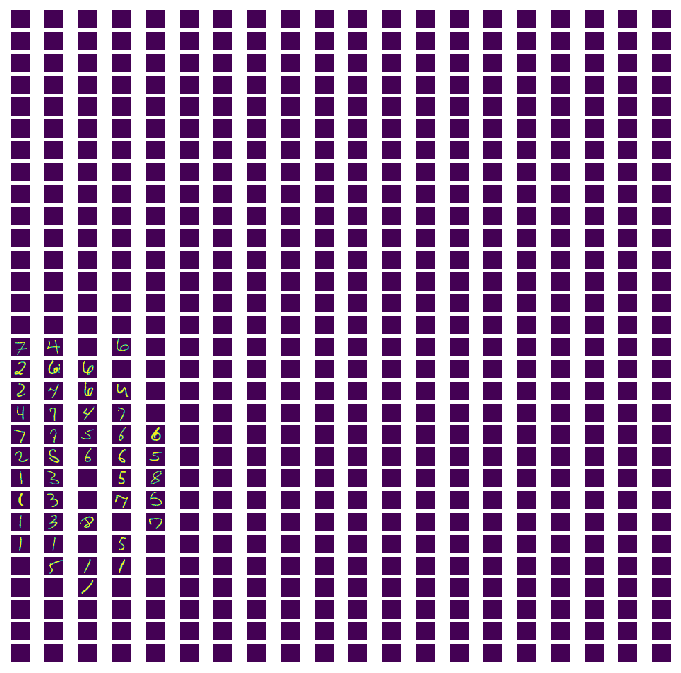

In [118]:
figure(figsize=(12, 12))
c = 1

for j in reversed(range(y_dim)):
    for i in range(x_dim):
        subplot(y_dim, x_dim, c, frameon=False, xticks=[], yticks=[])
        if (i,j) in winners:
            imshow(np.array(images[winners[i,j]]).reshape(28,28))
        else:
            imshow(zeros((28,28)))
        c += 1

As the SOM weights are also vectors in the input space, we can also draw the weights as images. 

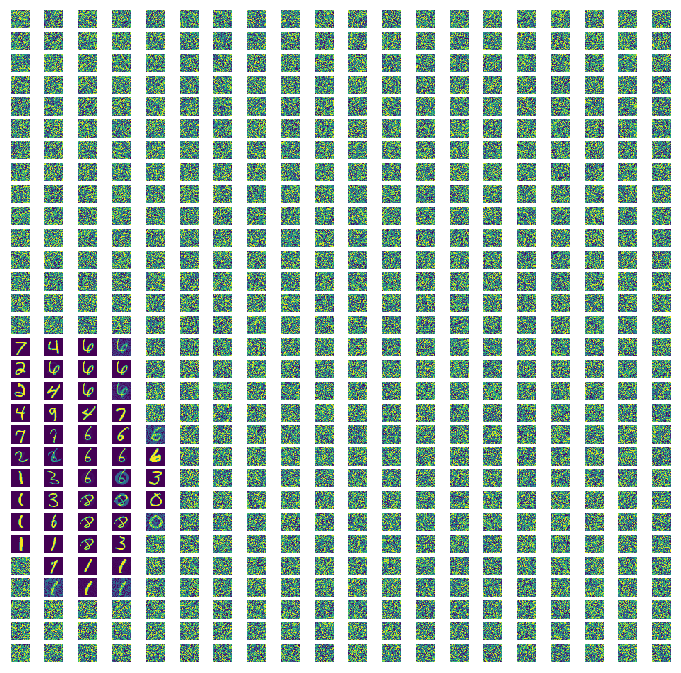

In [117]:
figure(figsize=(12, 12))
c = 1
for j in reversed(range(y_dim)):
	for i in range(x_dim):
		subplot(y_dim,x_dim, c,frameon=False, xticks=[], yticks=[])
		imshow(som._weights[i,j].reshape(28,28))
		c += 1